https://github.com/codebasics/py/blob/master/ML/18_PCA/PCA_tutorial_digits.ipynb

https://www.youtube.com/watch?v=8klqIM9UvAc

#Import Libraries

## Digit dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

###Download Dataset

In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

###Data Exploration

In [ ]:
dataset.data.shape

(1797, 64)

In [ ]:

dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

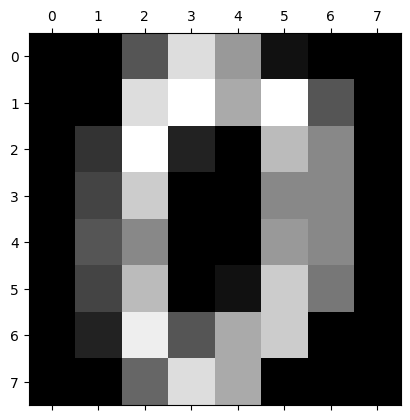

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8));

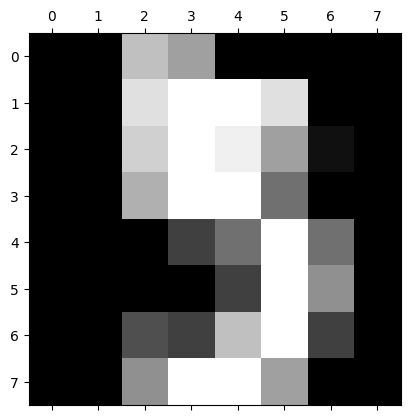

In [ ]:
plt.matshow(dataset.data[5].reshape(8,8))

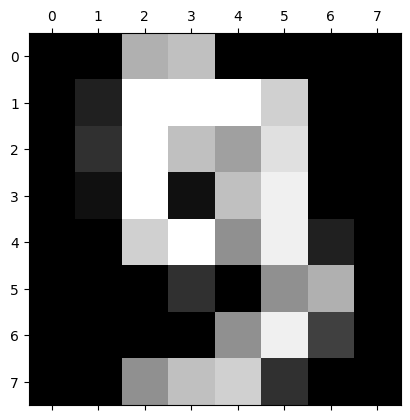

In [ ]:
plt.matshow(dataset.data[9].reshape(8,8))

In [ ]:
dataset.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-14-797df1022c40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dg = sns.countplot(data = data.frame, x = "target", palette='Spectral')


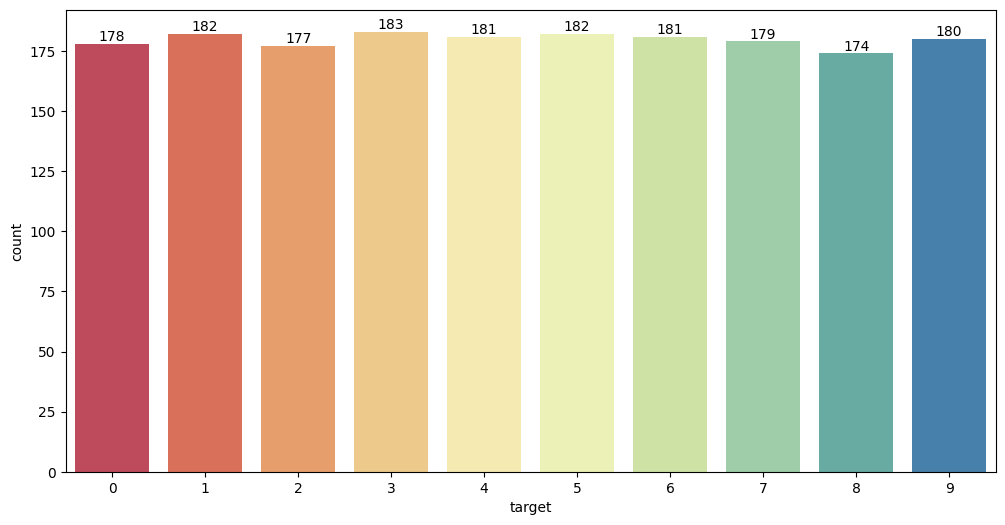

In [ ]:
data = load_digits(as_frame=True)

plt.figure(figsize=(12,6))
dg = sns.countplot(data = data.frame, x = "target", palette='Spectral')
add_label(dg)
plt.show()

###Data Normalization

In [ ]:
X = df
y = dataset.target

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

###Model Training

####1.Without PCA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [ ]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


####2.With PCA : Percent of Variance = 95

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  #95 percent of variance
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9547965245651595

In [ ]:
pca.n_components_

29

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

####3.With PCA : N Component = 2

In [ ]:
pca = PCA(n_components=2) #define the number of components is equal two
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [ ]:
pca.explained_variance_ratio_.sum()

0.28509364823699285

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

####4.With PCA : Percent of Variance = 80

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 13)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [ ]:
pca.explained_variance_ratio_.sum()

0.8028957761040317

In [ ]:
pca.n_components_

13

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.58595688,
          1.55160708,  -0.85449671],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   5.38571495,
         -2.12951093,   2.55532447],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   1.23337439,
         -0.38379119,  -0.20888485],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -8.13408897,
          3.77724024,  -3.46436121],
       [ -4.87210009, -12.42395362,  10.17086635, ...,  -3.24181414,
          1.20041302,   9.3703785 ],
       [ -0.34438963,  -6.36554919, -10.77370849, ..., -11.07390908,
          6.13590258,  -4.67579549]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9444444444444444

####5.With PCA : N Component = 10




In [ ]:
pca = PCA(n_components=10) #define the number of components is equal two
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.55347036,
          0.58184214,  -3.62569695],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.61593641,
         -3.58745013,   1.07470456],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  16.41519983,
         -0.7192329 ,  -4.25580548],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   7.4150719 ,
          3.96158533,  13.06509519],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   4.35789156,
         -3.93924173,  13.14525475],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.66902071,
          4.11316505,  12.56200443]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7382267688459531

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9416666666666667

#### 7.With PCA : N Component = 10 & iterated_power = 400

In [ ]:
pca = PCA(n_components=10,iterated_power = 400)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.55347036,
          0.58184214,  -3.62569695],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.61593641,
         -3.58745013,   1.07470456],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  16.41519983,
         -0.7192329 ,  -4.25580548],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   7.4150719 ,
          3.96158533,  13.06509519],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   4.35789156,
         -3.93924173,  13.14525475],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.66902071,
          4.11316505,  12.56200443]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7382267688459531

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9416666666666667

####With PCA : N Component = 10 & random_state = 40

In [ ]:
pca = PCA(n_components=10,random_state = 40)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -2.55347036,
          0.58184214,  -3.62569695],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.61593641,
         -3.58745013,   1.07470456],
       [  6.99192297,   9.95598641,  -2.95855808, ...,  16.41519983,
         -0.7192329 ,  -4.25580548],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   7.4150719 ,
          3.96158533,  13.06509519],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   4.35789156,
         -3.93924173,  13.14525475],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -0.66902071,
          4.11316505,  12.56200443]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7382267688459531

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9416666666666667

## IRIS - Dataset

###Download Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###Data Exploration

In [ ]:
df.sample(10)

,sepal length,sepal width,petal length,petal width,target
64,5.6,2.9,3.6,1.3,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor


In [ ]:
df.describe().round(2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


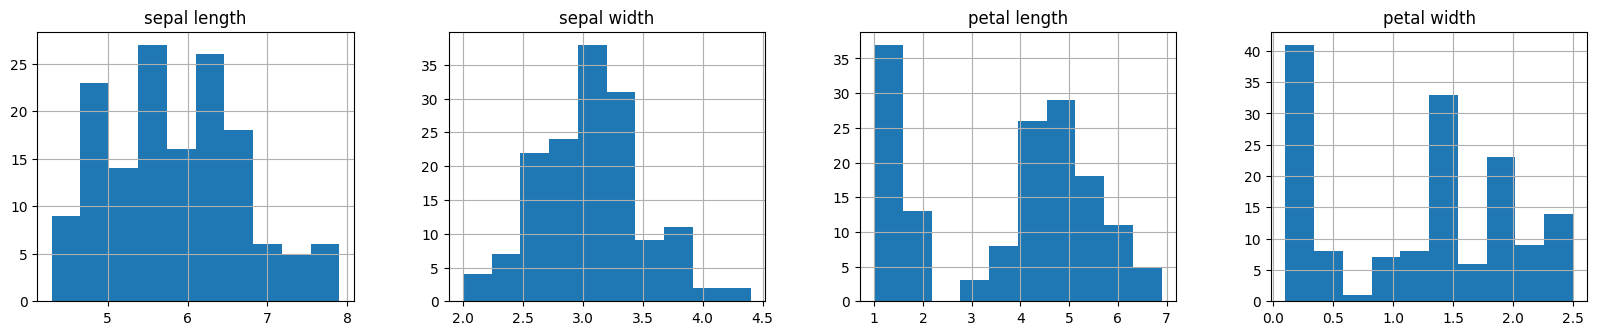

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df.hist(layout=(1, len(features)), figsize=(5 * len(features), 3.5));

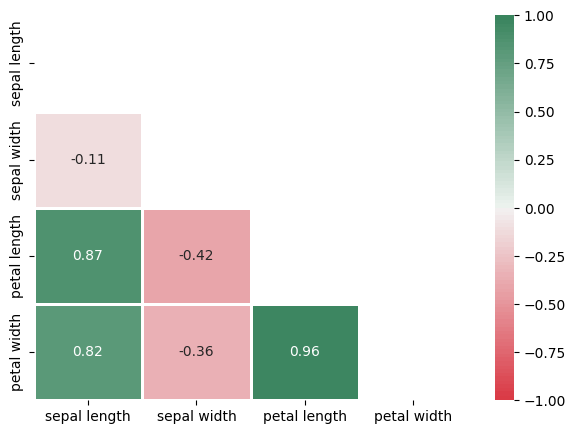

In [ ]:
dcorr = df[features].corr()

mask = np.zeros_like(dcorr)
#mask shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

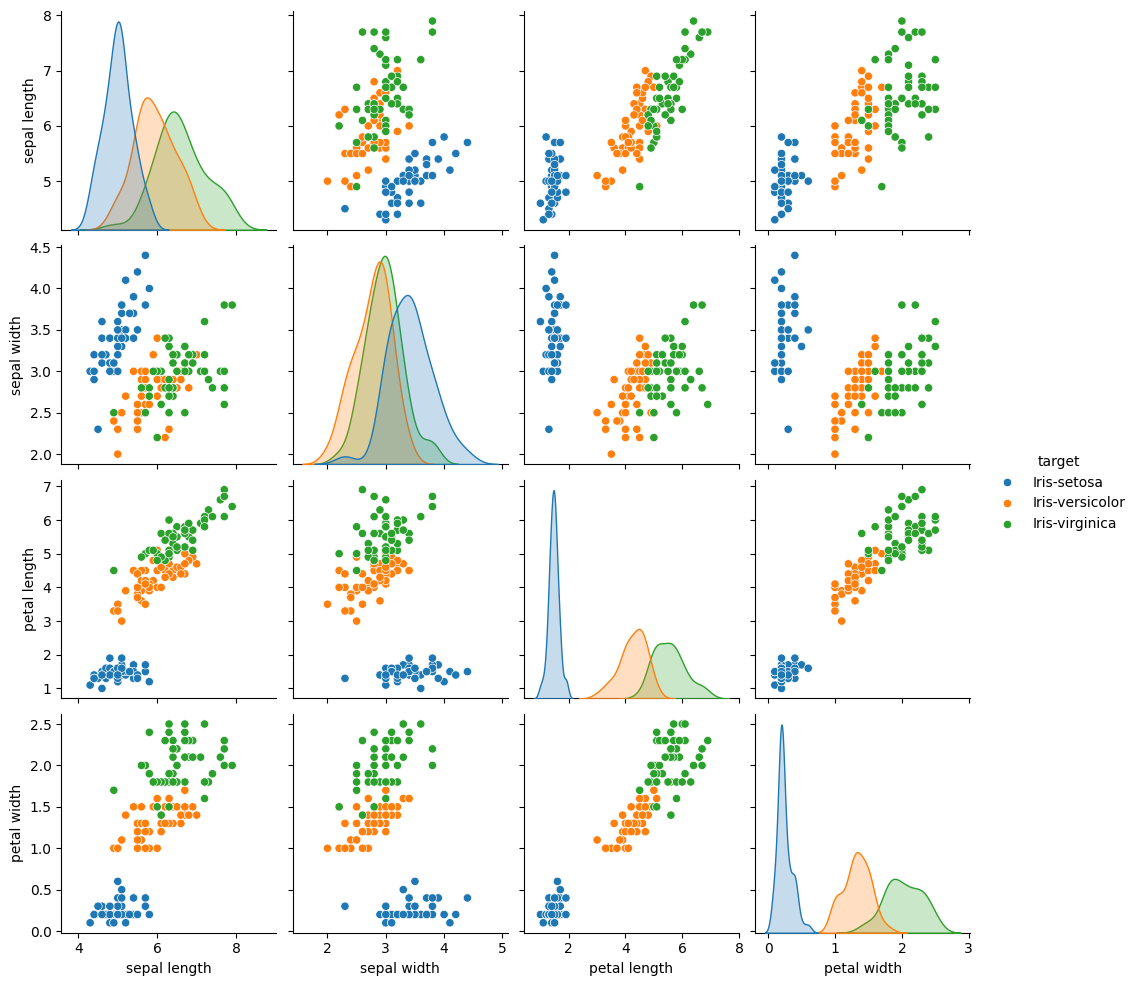

In [ ]:
sns.pairplot(df, vars=features,
             hue='target');

###Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
x_df = pd.DataFrame(x)
x_df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

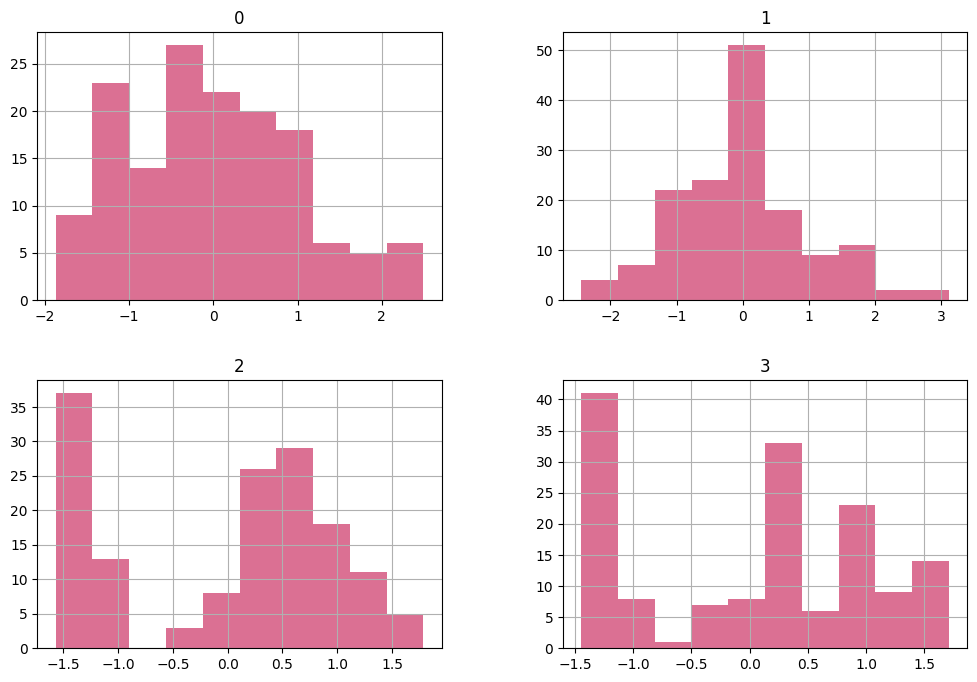

In [ ]:
numerical_attributes = x_df.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(12,8), color = 'PaleVioletRed')

###Model Training

####Without PCA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y[:, 0], test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

####With PCA : Percent of Variance = 95

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  #95 percent of variance
X_pca = pca.fit_transform(x)
X_pca.shape

(150, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

In [ ]:
pca.n_components_

2

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y[:,0], test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9333333333333333

In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


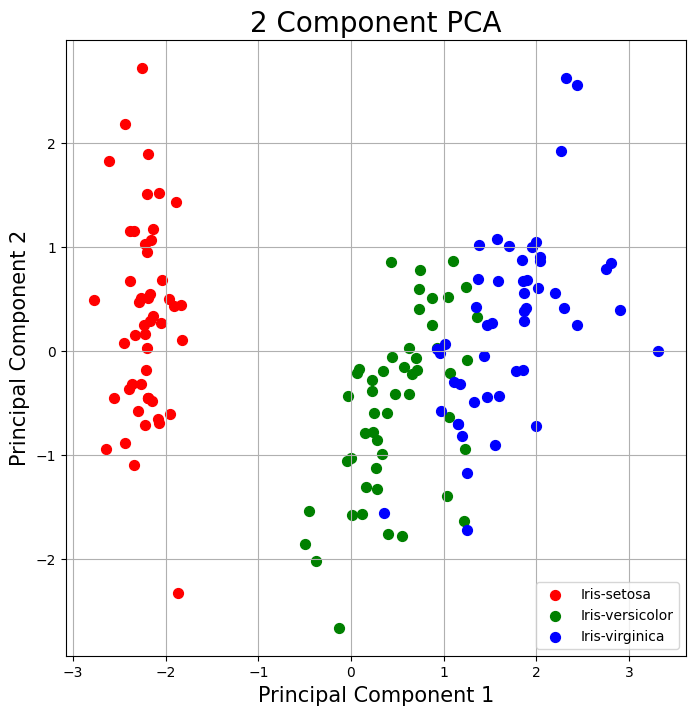

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

####With PCA : N Component = 1

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)
X_pca.shape

(150, 1)

In [ ]:
pca.explained_variance_ratio_

array([0.72770452])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7277045209380136

In [ ]:
pca.n_components_

1

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y[:,0], test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9666666666666667

####With PCA : N Component = 3 & iterated_power = 400

In [ ]:
pca = PCA(n_components=3,iterated_power = 400)
X_pca = pca.fit_transform(x)
X_pca.shape

(150, 3)

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9948480731910938

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y[:,0], test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9333333333333333

####With PCA : N Component = 1 & random_state = 40

In [ ]:
pca = PCA(n_components=1,random_state = 40)
X_pca = pca.fit_transform(x)
X_pca.shape

(150, 1)

In [ ]:
pca.explained_variance_ratio_

array([0.72770452])

In [ ]:
pca.explained_variance_ratio_.sum()

0.7277045209380136

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y[:,0], test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9666666666666667